## This example LiFePO4 band structure and DOS

In [1]:
%load_ext aiida
%aiida

Loaded AiiDA DB environment - profile name: ucl.

In [2]:
from aiida_user_addons.vworkflows.relax import VaspRelaxWorkChain
from aiida_user_addons.common.builder_updater import VaspRelaxUpdater, VaspBandUpdater
from aiida_user_addons.tools.dryrun import dryrun_relax_builder

from aiida_grouppathx import GroupPathX

from aiida.engine import submit

In [3]:
base = GroupPathX('lfp-demo')

In [4]:
lfp_structure =base.browse.lfp_relaxation().get_node().outputs.relax.structure

In [5]:
config_scf = {
    'code': 'vasp-6.3.0-std@young',
    'inputset': 'UCLRelaxSet',
    'overrides': {'encut': 520, 'magmom_mapping': {'Fe': 4.0, 'default': 0.6}, 'ldauu_mapping' : {'Fe': ['d', 4.0]}, 'kpar': 8, 'ncore': 5, 'symprec': 1e-8},
    'options':{
        'max_wallclock_seconds': 3600 * 2,
        'custom_scheduler_commands': '#$ -P Gold\n#$ -A UCL_ChemM_Scanlon',
        'resources': {'parallel_env': 'mpi', 'tot_num_mpiprocs': 80}
    },
    'dos_kpoints_density': 0.05
}
config = {
    'scf': config_scf
}

upd = VaspBandUpdater.init_from_config(lfp_structure, config)
upd.builder.metadata.label = "LFP PBEsol Bands"

upd.builder.dos_kpoints_density = 0.03
upd.builder.symprec = Float(1e-5)

Using input set file at: /home/bonan/aiida_envs/aiida-2.0/aiida-user-addons/aiida_user_addons/common/inputset/UCLRelaxSet.yaml


In [6]:
upd.builder.relax

{'metadata': {}, 'vasp': {'metadata': {}, 'dynamics': {}}}

In [17]:
submit(upd.builder)

<WorkChainNode: uuid: c529014b-b948-4130-a6da-f0d6e3dd5e39 (pk: 739606) (aiida.workflows:vaspu.bands)>

In [9]:
work = base.browse.lfp_band().get_node()

In [10]:
from aiida_user_addons.tools.sumo import get_sumo_bands_plotter, get_sumo_dos_plotter

/home/bonan/miniconda3/envs/aiida-2.0/lib/python3.9/site-packages/pymatgen/electronic_structure/boltztrap.py:61: FutureWarning: which is deprecated; use which in shutil instead.
shutil.which has been available since Python 3.3. This will be removed in v2023.
  @requires(which('x_trans'),


<module 'matplotlib.pyplot' from '/home/bonan/miniconda3/envs/aiida-2.0/lib/python3.9/site-packages/matplotlib/pyplot.py'>

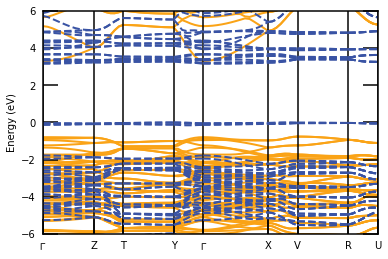

In [11]:
plotter =get_sumo_bands_plotter(work.outputs.band_structure, structure=work.inputs.structure)
plotter.get_plot(dpi=120)

<module 'matplotlib.pyplot' from '/home/bonan/miniconda3/envs/aiida-2.0/lib/python3.9/site-packages/matplotlib/pyplot.py'>

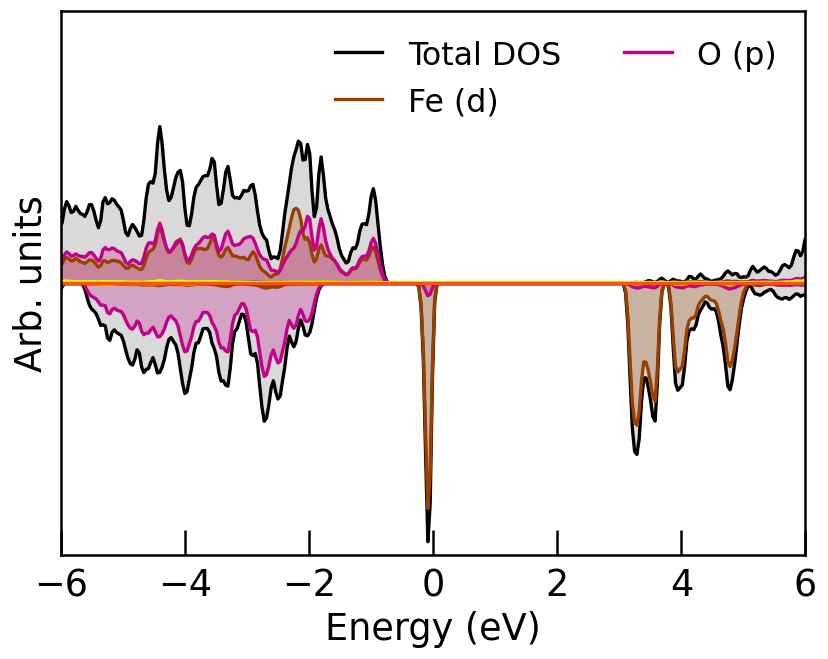

In [12]:
plotter =get_sumo_dos_plotter(work.called[-2])
plotter.get_plot(dpi=120)

In [13]:
from aiida_user_addons.tools.vasp import export_vasp_calc

In [14]:
export_vasp_calc(work.called[-2], "lfp-dos")

In [15]:
!cd lfp-dos && sumo-dosplot

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Whitney Book Extended, Catamaran, Helvetica, Liberation Sans, Andale Sans, Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Whitney Book Extended, Catamaran, Helvetica, Liberation Sans, Andale Sans, Arial
maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
name pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 35 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'D', 'E', 'F', 'O', 'S', 'T', 'V', 'a', 'b', 'd', 'e', 'four', 'g', 'i', 'l', 'minus', 'n', 'nonmarkingreturn', 'o', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'six', 'space', 't', 'two', 'u', 'y', 'zero']
Glyph IDs:   [0, 1

# Provenance Graph visualization

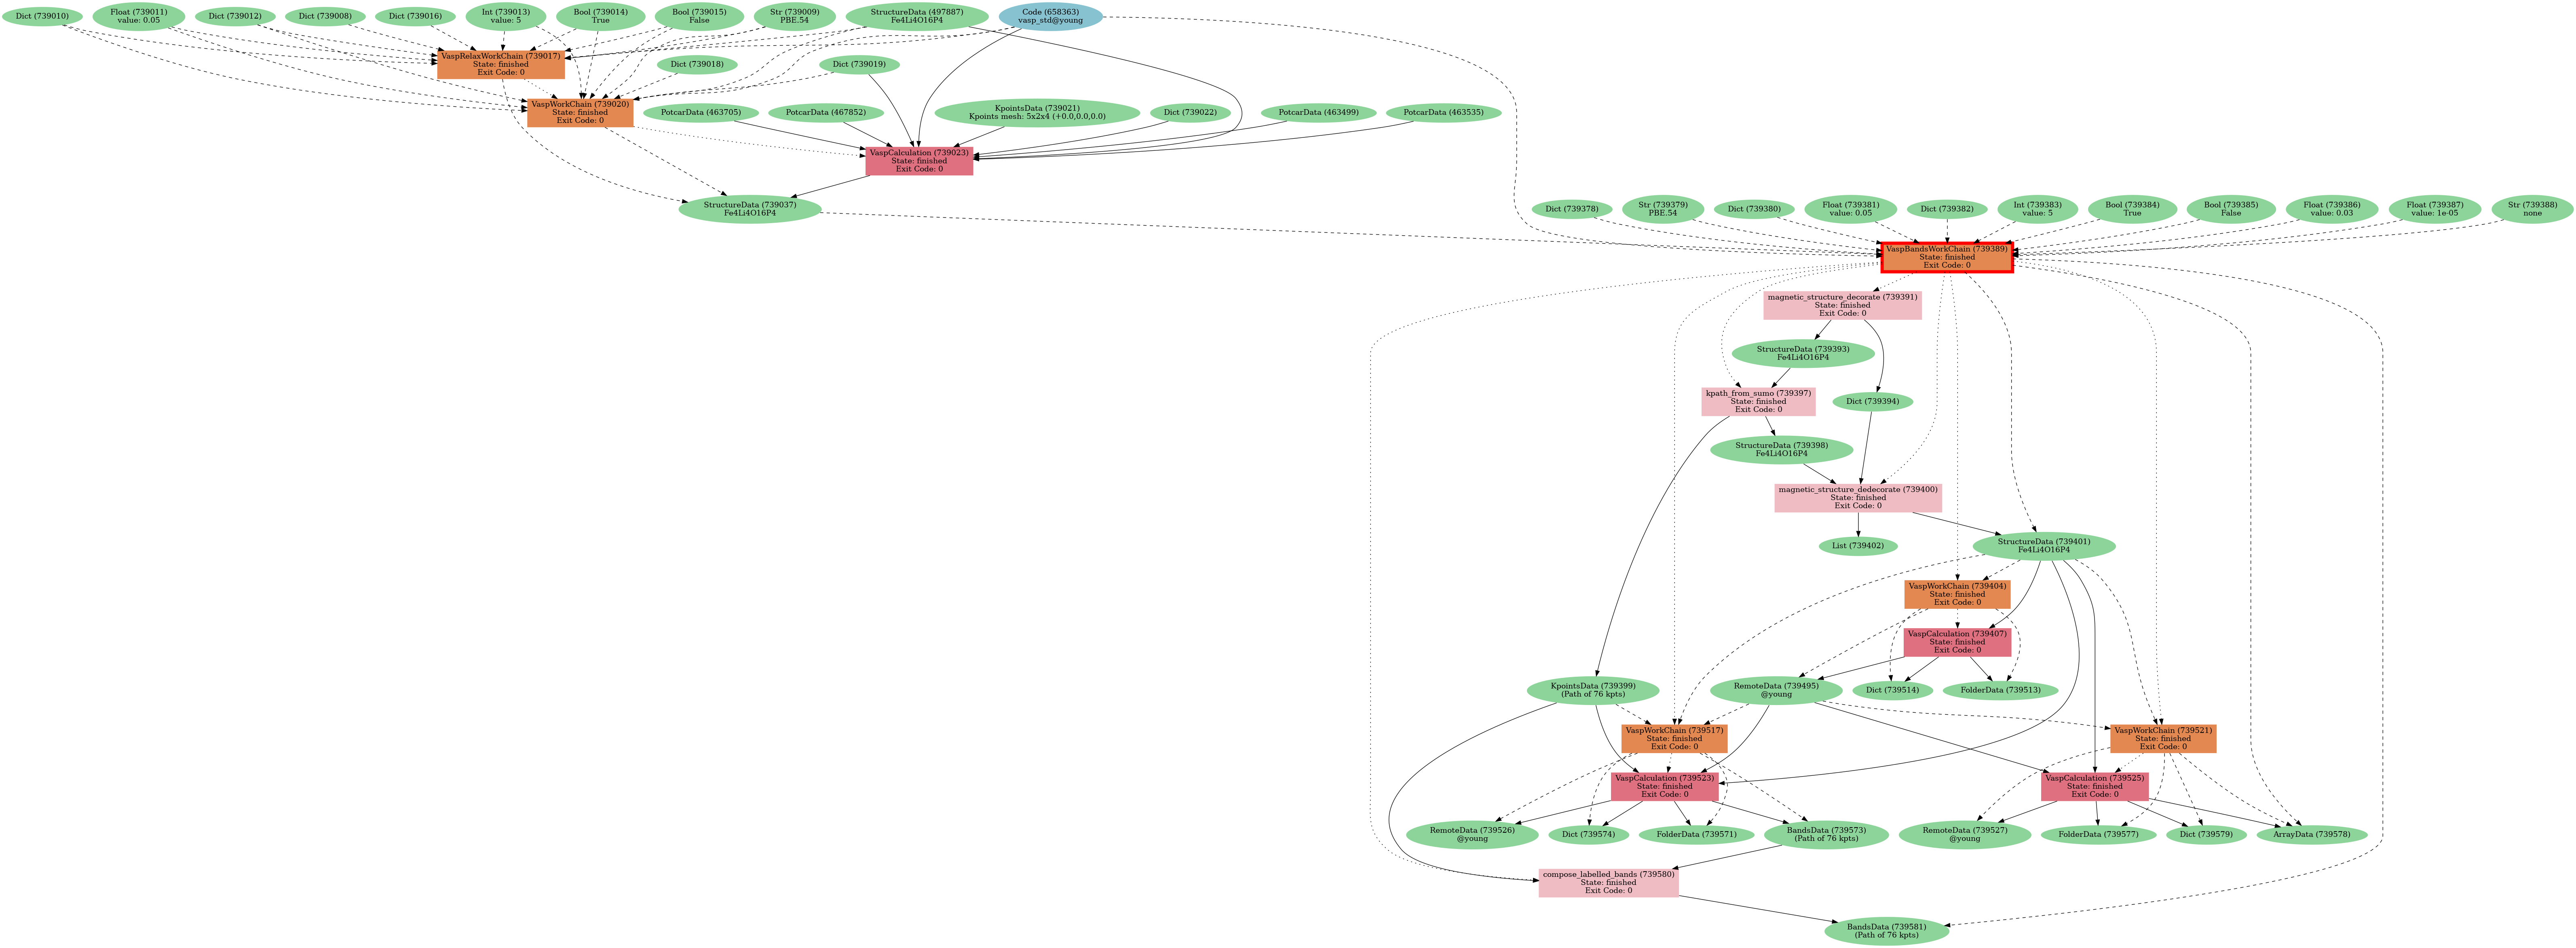

In [16]:
from aiida.tools.visualization import Graph

graph = Graph()
# Add all ancestors and childrens
graph.recurse_ancestors(origin=work)
graph.recurse_descendants(origin=work)
graph.graphviz.render('lfp-bands', format='png')  # Saves to the disk, alternatively `graph.graphviz` is sufficient
graph.graphviz.render('lfp-bands', format='pdf')  # Saves to the disk, alternatively `graph.graphviz` is sufficient

from IPython.display import Image
Image("lfp-bands.png")